In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# y = 0.8x^2 + 0.9x + 2

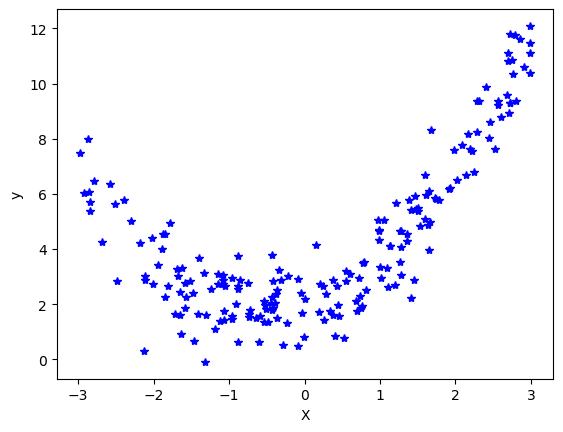

In [3]:
plt.plot(X,y,'b*')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=2)

In [5]:
# Applying Linear Regression

lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)

In [13]:
from sklearn.model_selection import cross_val_score

In [17]:
np.mean(cross_val_score(lr, X,y,cv=10))

0.28971254532302976

In [18]:
r2_score(y_test,y_pred)

0.4506310109093655

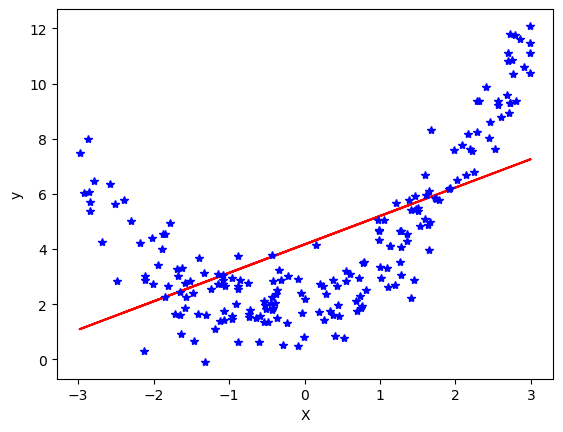

In [19]:
plt.plot(X_train,lr.predict(X_train),'r')
plt.plot(X,y,'b*')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
print(X_train[0])

[-2.38997244]


In [12]:
print(X_train_poly[0])

[ 1.         -2.38997244  5.71196825]


In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test_poly)

In [25]:
r2_score(y_test,y_pred)

0.8997824123073027

In [34]:
np.mean(cross_val_score(lr, X_train_poly,y_train,cv=10))

0.8581455192997105

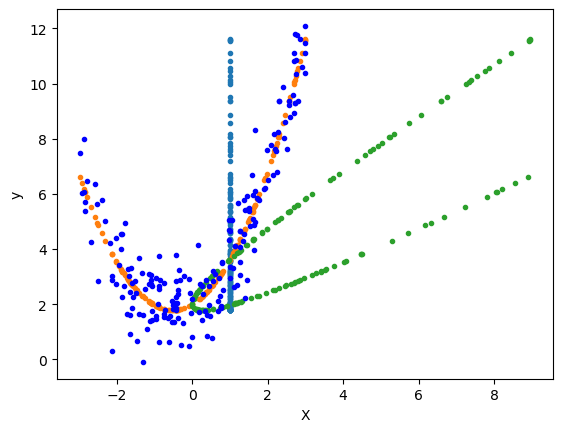

In [32]:
plt.plot(X_train_poly,lr.predict(X_train_poly),'.')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [35]:
print(lr.coef_)

[[0.         0.82637096 0.7948902 ]]


In [36]:
print(lr.intercept_)

[2.00183221]


In [40]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

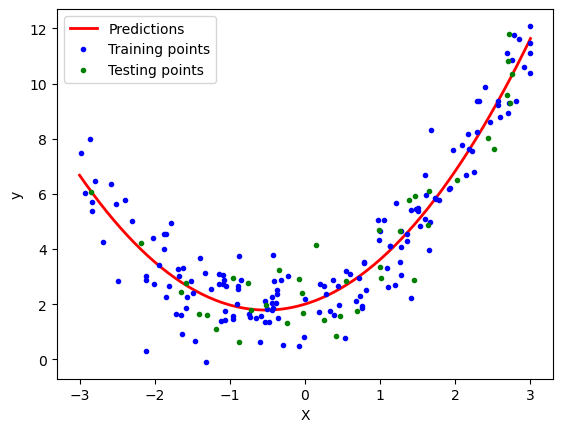

In [44]:
plt.plot(X_new,y_new,'r-',linewidth=2,label='Predictions')
plt.plot(X_train,y_train,'b.',label='Training points')
plt.plot(X_test,y_test, 'g.',label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [46]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100,1)
    X_new_poly = poly.transform(X_new)
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,'r',label='Degree '+str(degree), linewidth=2)
    
    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_test, y_test, 'g.',linewidth=3)
    plt.legend(loc='best')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-3, 3, 0, 10])
    plt.show()

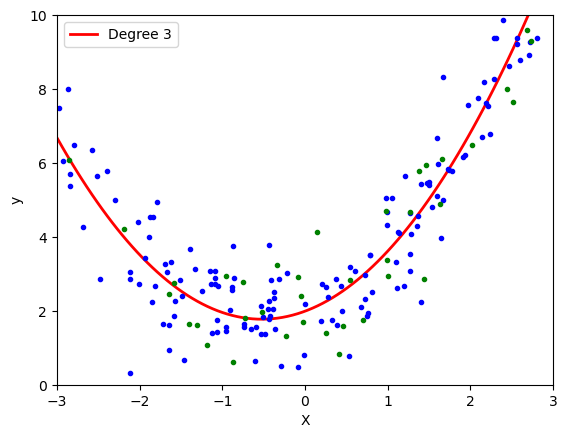

In [47]:
polynomial_regression(3)

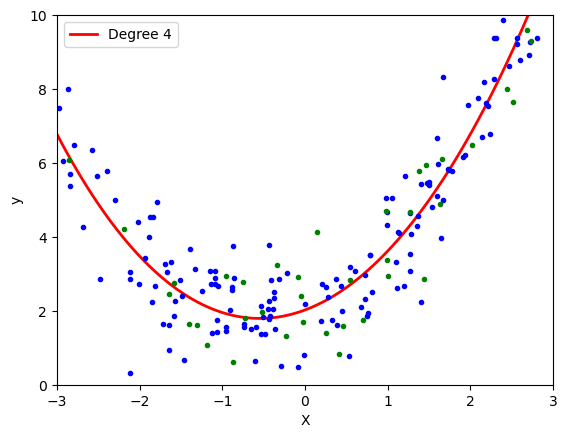

In [58]:
polynomial_regression(4)